# Non-Linear Filters and Image Pyramids

Sometimes noise has very large values called Shot Noise. Regular blurring with a Gaussian filter fails to remove the noisy pixels and instead turns them into softer (but still visible) spots.

In [1]:
import numpy as np
import cv2 as cv
from scipy import signal
import matplotlib.pyplot as plt

## Median Filter on 1D

In [2]:
image = np.array([3, 9, 4, 52, 3, 8, 6, 2, 2])
image_median = signal.medfilt(image)
print(image_median)

[3. 4. 9. 4. 8. 6. 6. 2. 2.]


## Median Filter on 2D

In [3]:
image_2d = np.array([[2, 3, 1], [0, 5, 1], [1, 0, 8]], dtype="float32")
image_2d_median = signal.medfilt2d(image_2d)
print(image_2d_median)

[[0. 1. 0.]
 [0. 1. 1.]
 [0. 0. 0.]]


## Loading Image

([], <a list of 0 Text yticklabel objects>)

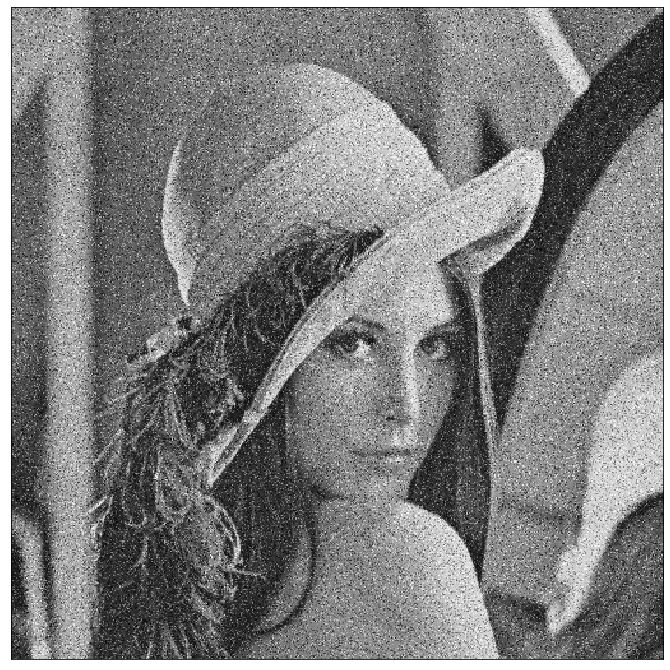

In [4]:
image = cv.imread("Lena_Noisy.jpg")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(12, 12))
plt.imshow(image_gray, cmap="gray")
plt.xticks([])
plt.yticks([])

## Median Filter using Scipy

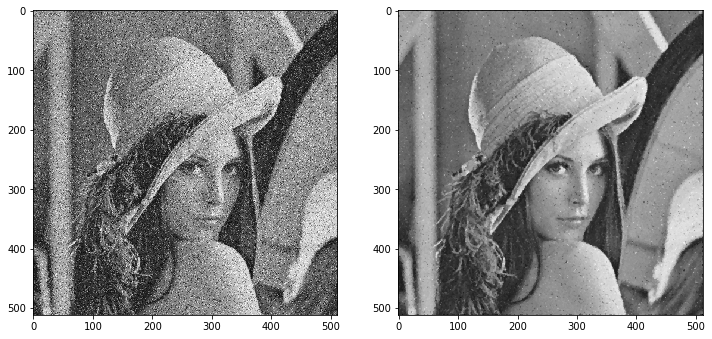

In [5]:
image_median = signal.medfilt2d(image_gray, (3, 3))

plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(image_gray, cmap="gray")
plt.subplot(122)
plt.imshow(image_median, cmap="gray")

## Median Filter using OpenCV

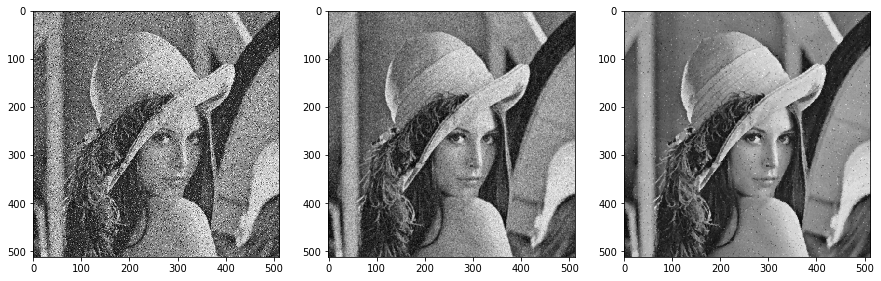

In [6]:
image_cv = cv.imread("Lena_Noisy.jpg")
image_gray = cv.cvtColor(image_cv, cv.COLOR_BGR2GRAY)
image_gauss = cv.GaussianBlur(image_gray, (3,3), 0)
image_cv_median = cv.medianBlur(image_gray, 3)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(image_gauss, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(image_cv_median, cmap="gray")

## Bilateral filtering

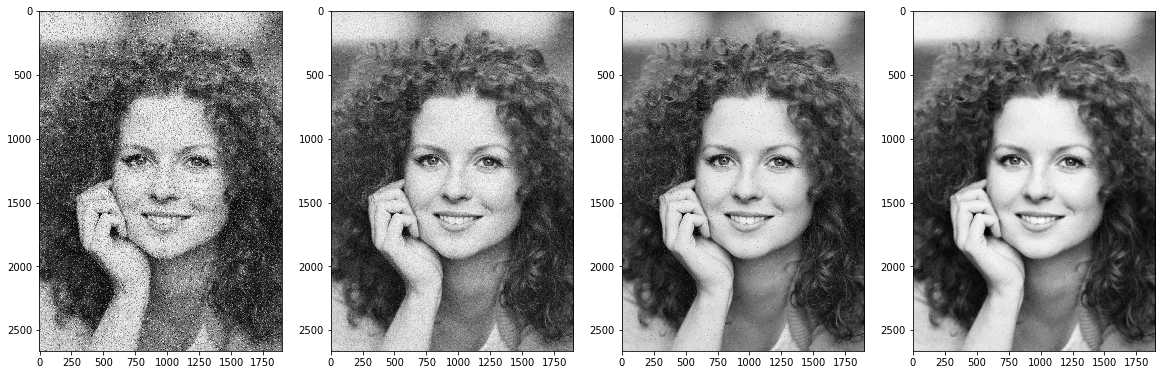

In [7]:
image_cv = cv.imread("lady.jpg")
image_cv = cv.cvtColor(image_cv, cv.COLOR_BGR2GRAY)
image_gauss = cv.GaussianBlur(image_cv, (3,3), 0)
image_cv_median = cv.medianBlur(image_cv, 3)
image_cv_bilateral = cv.bilateralFilter(image_cv, 15, 100, 100)

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(image_cv, cmap="gray")
plt.subplot(1, 4, 2)
plt.imshow(image_gauss, cmap="gray")
plt.subplot(1, 4, 3)
plt.imshow(image_cv_median, cmap="gray")
plt.subplot(1, 4, 4)
plt.imshow(image_cv_bilateral, cmap="gray")

## Gaussian Pyramid

Image Shape: (512, 512, 3)
Image Shape: (256, 256, 3)


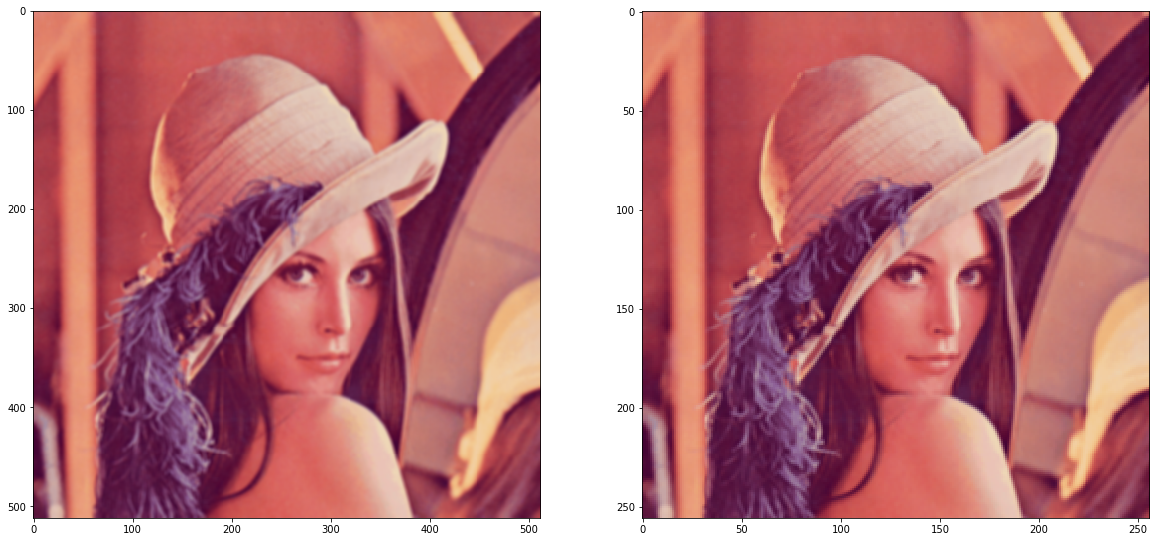

In [8]:
image = cv.imread("lena.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

print("Image Shape:", image.shape)

image[:,:,0] = cv.GaussianBlur(image[:,:,0], (5,5), 2, 2)
image[:,:,1] = cv.GaussianBlur(image[:,:,1], (5,5), 2, 2)
image[:,:,2] = cv.GaussianBlur(image[:,:,2], (5,5), 2, 2)

resized_image = image[::2,::2,:]
print("Image Shape:", resized_image.shape)

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(resized_image)

### Using OpenCV PyrDown

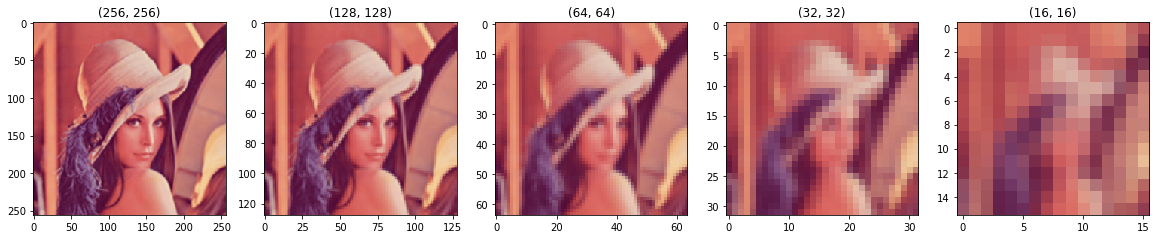

In [9]:
def gaussian_pyramid(Image, levels=6):
    img_copy = Image.copy()
    g_pyramid = [img_copy]
    for i in range(levels):
        img_copy = cv.pyrDown(img_copy)
        g_pyramid.append(img_copy)
    return g_pyramid

img_pyramid = gaussian_pyramid(image)

plt.figure(figsize=(20,20))
plt.subplot(1,5,1)
plt.gca().set_title("({}, {})".format(img_pyramid[1].shape[0],img_pyramid[1].shape[1]))
plt.imshow(img_pyramid[1])
plt.subplot(1,5,2)
plt.gca().set_title("({}, {})".format(img_pyramid[2].shape[0],img_pyramid[2].shape[1]))
plt.imshow(img_pyramid[2])
plt.subplot(1,5,3)
plt.gca().set_title("({}, {})".format(img_pyramid[3].shape[0],img_pyramid[3].shape[1]))
plt.imshow(img_pyramid[3])
plt.subplot(1,5,4)
plt.gca().set_title("({}, {})".format(img_pyramid[4].shape[0],img_pyramid[4].shape[1]))
plt.imshow(img_pyramid[4])
plt.subplot(1,5,5)
plt.gca().set_title("({}, {})".format(img_pyramid[5].shape[0],img_pyramid[5].shape[1]))
plt.imshow(img_pyramid[5])


### Laplacian Pyramid

In [10]:
image = cv.imread("lena.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

gauss_pyramid = gaussian_pyramid(image)
print(len(gauss_pyramid))

7


In [11]:
def laplacian_pyramid(gpI):
    levels = len(gpI) - 1
    laplacian = [gpI[levels]]
    
    for i in range(levels, 0, -1):
        gaussian = cv.pyrUp(gpI[i])
        lap_pyramid = cv.subtract(gpI[i-1], gaussian)
        laplacian.append(lap_pyramid)
    return laplacian

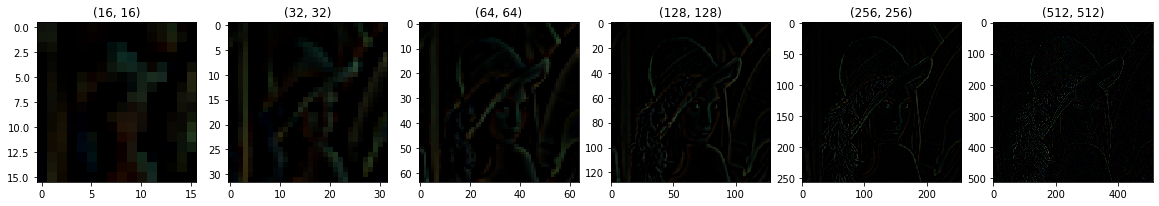

In [12]:
lap_image = laplacian_pyramid(gauss_pyramid)

plt.figure(figsize=(20,20))
plt.subplot(1,6,1)
plt.gca().set_title("({}, {})".format(lap_image[1].shape[0],lap_image[1].shape[1]))
plt.imshow(lap_image[1])
plt.subplot(1,6,2)
plt.gca().set_title("({}, {})".format(lap_image[2].shape[0],lap_image[2].shape[1]))
plt.imshow(lap_image[2])
plt.subplot(1,6,3)
plt.gca().set_title("({}, {})".format(lap_image[3].shape[0],lap_image[3].shape[1]))
plt.imshow(lap_image[3])
plt.subplot(1,6,4)
plt.gca().set_title("({}, {})".format(lap_image[4].shape[0],lap_image[4].shape[1]))
plt.imshow(lap_image[4])
plt.subplot(1,6,5)
plt.gca().set_title("({}, {})".format(lap_image[5].shape[0],lap_image[5].shape[1]))
plt.imshow(lap_image[5])
plt.subplot(1,6,6)
plt.gca().set_title("({}, {})".format(lap_image[6].shape[0],lap_image[6].shape[1]))
plt.imshow(lap_image[6])

### Image Blending

(512, 512, 3)
(512, 512, 3)


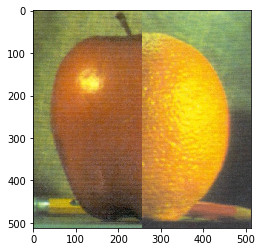

In [13]:
apple = cv.imread("apple.jpg")
apple = cv.cvtColor(apple, cv.COLOR_BGR2RGB)
print(apple.shape)

orange = cv.imread("orange.jpg")
orange = cv.cvtColor(orange, cv.COLOR_BGR2RGB)
print(orange.shape)

apple_orange = np.hstack((apple[:, 0:apple.shape[0]//2, :], orange[:, orange.shape[0]//2:,:]))
plt.imshow(apple_orange)


#apple = cv.imread("apple.jpg")
#apple = cv.cvtColor(apple, cv.COLOR_BGR2RGB)

#orange = cv.imread("orange.jpg")
#orange = cv.cvtColor(orange, cv.COLOR_BGR2RGB)

#apple_half = apple[:, 0:apple.shape[0]//2, :]
#plt.subplot(131)
#plt.imshow(apple_half)

#orange_half = orange[:, orange.shape[0]//2:, :]
#plt.subplot(132)
#plt.imshow(orange_half)

#apple_orange  = np.hstack((apple_half, orange_half))

#plt.subplot(133)
#plt.imshow(apple_orange)

### Image Blending using Pyramids

(512, 512, 3)
(512, 512, 3)


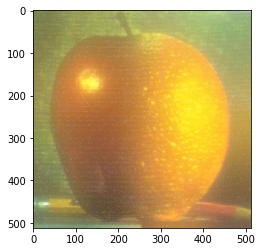

In [14]:
# Step 1: Load images
apple = cv.imread("apple.jpg")
apple = cv.cvtColor(apple, cv.COLOR_BGR2RGB)
print(apple.shape)

orange = cv.imread("orange.jpg")
orange = cv.cvtColor(orange, cv.COLOR_BGR2RGB)
print(orange.shape)

# Step 2: Find Gaussian Pyramid for both images
apple_gauss_pyramid = gaussian_pyramid(apple)
orange_gauss_pyramid = gaussian_pyramid(orange)

# Step 3: Find Laplacian Pyramids
apple_lap_pyramid = laplacian_pyramid(apple_gauss_pyramid)
orange_lap_pyramid = laplacian_pyramid(orange_gauss_pyramid)

# Step 4: Join both images
apple_orange_pyramid = []

for apple_lap, orange_lap in zip(apple_lap_pyramid, orange_lap_pyramid):
    cols, rows, channels = apple_lap.shape
    laplacian_image = np.hstack((apple_lap[:, 0:cols//2], orange_lap[:, cols//2:]))
    apple_orange_pyramid.append(laplacian_image)

# Step 5: Reconstruct the original image
apple_orange_reconstruct = apple_orange_pyramid[0]

for i in range(1, 7):
    apple_orange_reconstruct = cv.pyrUp(apple_orange_reconstruct)
    apple_orange_reconstruct = cv.add(apple_orange_pyramid[i], apple_orange_reconstruct)
    
plt.imshow(apple_orange_reconstruct)